In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Housing.csv")
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.shape

(545, 13)

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.fillna(method="ffill",axis=0,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
df.select_dtypes(include="object")#.isnull().sum()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [14]:
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [18]:
df.isnull().sum().sum()

0

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()

In [24]:
df["furnishingstatus"]=encoder.fit_transform(df["furnishingstatus"])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,2
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,2
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,0


In [26]:
df.drop(["bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"],axis="columns",inplace=True)

df

,price,area,furnishingstatus
0,13300000,7420,0
1,12250000,8960,0
2,12250000,9960,1
3,12215000,7500,0
4,11410000,7420,0
...,...,...,...
540,1820000,3000,2
541,1767150,2400,1
542,1750000,3620,2
543,1750000,2910,0


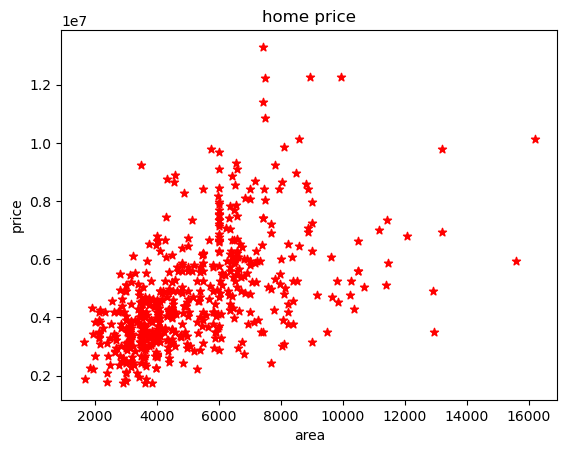

In [27]:
plt.scatter(df.area,df.price,color="r",marker="*")
plt.xlabel("area")
plt.ylabel("price")
plt.title("home price")
plt.show()

In [28]:
x=df[["area"]]
y=df["price"]


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
li=LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [36]:
li.predict(x_test)

array([3316478.48487125, 4669758.12491903, 3813753.08752135,
       4254125.62121148, 6213535.99583276, 3739532.99757357,
       7336238.55644278, 4234333.59722541, 5528237.16531496,
       5223934.79652908, 3163585.09957883, 5216512.78753431,
       4056205.38135075, 4036413.35736467, 3977037.28540645,
       5669255.33621574, 3739532.99757357, 5718735.39618092,
       5075494.61663353, 5204142.77254301, 4412461.81310007,
       6648960.52352638, 3828597.1055109 , 3887973.17746912,
       3986933.29739949, 6058168.60754208, 5520815.15632019,
       3858285.14149001, 6470832.30765171, 4214541.57323934,
       4283813.65719059, 4234333.59722541, 7133865.11118518,
       3405542.59280858, 5520815.15632019, 4293709.66918363,
       4219489.57923585, 4108159.44431419, 4184853.53726023,
       4085893.41732986, 5817695.51611129, 4481733.89705133,
       5223934.79652908, 5446595.06637241, 4927054.43673798,
       5921603.64203817, 5446595.06637241, 3634140.46984773,
       5431751.04838286,

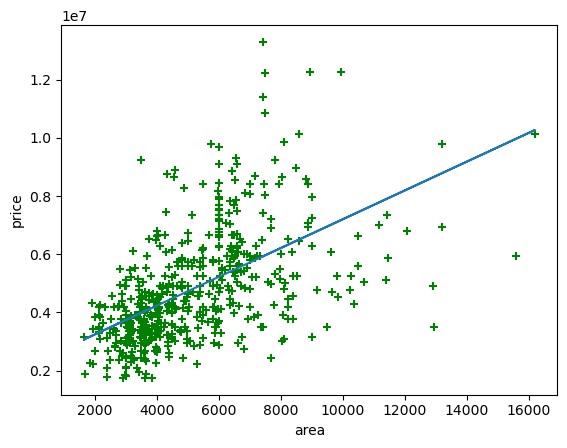

In [38]:
plt.plot(df.area,li.predict(df[["area"]]))
plt.scatter(df.area,df.price,color="g",marker="+")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [41]:
li.predict([[6500]])

array([5471335.096355])

In [42]:
li.coef_#m

array([494.80059965])

In [43]:
li.intercept_

2255131.1986180604

In [44]:
494.80059965*6500+2255131.1986180604

5471335.096343061

In [49]:
pred=li.predict(x_test)
pred

array([3316478.48487125, 4669758.12491903, 3813753.08752135,
       4254125.62121148, 6213535.99583276, 3739532.99757357,
       7336238.55644278, 4234333.59722541, 5528237.16531496,
       5223934.79652908, 3163585.09957883, 5216512.78753431,
       4056205.38135075, 4036413.35736467, 3977037.28540645,
       5669255.33621574, 3739532.99757357, 5718735.39618092,
       5075494.61663353, 5204142.77254301, 4412461.81310007,
       6648960.52352638, 3828597.1055109 , 3887973.17746912,
       3986933.29739949, 6058168.60754208, 5520815.15632019,
       3858285.14149001, 6470832.30765171, 4214541.57323934,
       4283813.65719059, 4234333.59722541, 7133865.11118518,
       3405542.59280858, 5520815.15632019, 4293709.66918363,
       4219489.57923585, 4108159.44431419, 4184853.53726023,
       4085893.41732986, 5817695.51611129, 4481733.89705133,
       5223934.79652908, 5446595.06637241, 4927054.43673798,
       5921603.64203817, 5446595.06637241, 3634140.46984773,
       5431751.04838286,

In [47]:
li.score(x_test,y_test)

0.20790295441258533

In [48]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test,pred)

1639597754045.125

# KNN Regession

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=10)

In [59]:
pred=knn.predict(x_test)
pred

array([3482500., 4720800., 3540600., 4067700., 6268500., 3243100.,
       5792500., 4080300., 6353550., 7565600., 3363500., 7565600.,
       3154200., 3339350., 4075750., 5812394., 3243100., 5960794.,
       5099500., 7446600., 4053000., 7574000., 3323600., 3739050.,
       4311300., 7303800., 6490050., 3483550., 6099100., 4098500.,
       4153800., 4080300., 6006000., 2980600., 6490050., 4265800.,
       4046000., 4070500., 3493000., 3447500., 5412400., 3977750.,
       7565600., 6047300., 4474400., 8458800., 6047300., 3343900.,
       5763100., 3573500., 3323600., 3245200., 4370100., 4140500.,
       3243100., 3470600., 6050800., 6055000., 3150000., 3154200.,
       3451385., 4962300., 6498100., 7565600., 7303800., 4370100.,
       3385900., 3470600., 4153800., 5495700., 5763800., 3482500.,
       6490050., 6260100., 4993800., 3832500., 5419750., 4368000.,
       3881500., 7565600., 5084800., 8458800., 5336800., 5817000.,
       6688500., 3552500., 3482500., 3977750., 4722200., 59607

In [61]:
knn.score(x_test,y_test)

0.14323481878922595

In [ ]:
from sklearn.metrics import mean_squared_error  #mse

In [56]:
mean_squared_error(y_test,pred)

1773457273553.5137